<h2>Nettoyage des données inutilisables</h2>

In [1]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_excel('Bdd_bloc.xlsx')
pd.options.display.max_columns = 33
pd.options.display.max_rows = 50

#renomme les colonnes  
df.columns = ['NoCas', 'DateEntry', 'DateExit', 'DateBirth', 'Sex',
       'CIMDiagPr', 'CimAssoc1', 'CimAssoc2', 'CimAssoc3',
       'CimAssoc4', 'CimAssoc5', 'CCAM1', 'CCAM2', 'CCAM3', 'CCAM4',
       'GHMCode', 'Colonne2', 'Colonne1', 'Molon', 'Anesthesiste',
       'Chirurgien', 'Year', 'IDPatient', 'DateInter', 'NomPatient',
       'HourEntrySSPI',
       'HourEntryBLOC', 'HourIncision ',
       'HourExitBLOC', 'AnesthType',
       'AnesthLoco_reg', 'TimeHospit', 'Interv']

#on enlève les colonnes inutiles 
df = df.drop(columns=['Colonne2', 'Colonne1', 'Molon', 'NomPatient'])
df.shape

(14649, 29)

In [13]:
#on enlève les opérations esseulées (mal renseignées par les médecins) 
df = df.groupby('Interv').filter(lambda x : len(x)>8)
#et celle dont le chir n'est pas renseigné 
df = df.dropna(subset = ['Chirurgien', 'Interv']).reset_index(drop=True)
df.shape

(12976, 29)

In [14]:
#Création d'une colonne du temps au bloc 
IntervTime = []
for i in range (len(df)): 
    dtExit = df["HourExitBLOC"].iloc[i]
    dtEntry = df["HourEntryBLOC"].iloc[i]
    intervTime = dtExit.hour-dtEntry.hour + (dtExit.minute-dtEntry.minute)/60
    IntervTime.append(intervTime)

df.insert(25, "IntervTime", IntervTime)

#on enlève les interventions de temps nul
df = df.drop(df[(df["IntervTime"]==0)].index).reset_index(drop=True)
df.shape

(12913, 30)

In [15]:
#Création d'une colonne de temps en SSPI d'entrée 

TimeSSPI = []
for i in range (len(df)): 
        dtSSPI = df["HourEntrySSPI"].iloc[i]
        dtBLOC = df["HourEntryBLOC"].iloc[i]
        sspiTime = dtBLOC.hour-dtSSPI.hour + (dtBLOC.minute-dtSSPI.minute)/60
        if sspiTime == 0 : 
                sspiTime = np.nan
        TimeSSPI.append(sspiTime)

df.insert(25,"SSPITime", TimeSSPI)
        
df.shape

(12913, 31)

<h2>Études Statistiques</h2>

In [16]:
#stat sur les temps d'opération et d'hospitalisation en fonction de l'intervention 
meanIntervTime = df.groupby('Interv')["IntervTime"].mean()
stdIntervTime = df.groupby('Interv')["IntervTime"].std()
meanTimeH = df.groupby('Interv')["TimeHospit"].mean()
stdTimeH = df.groupby('Interv')["TimeHospit"].std()
meanSSPITime = df.groupby('Interv')["SSPITime"].mean() 
stdSSPITime = df.groupby('Interv')["SSPITime"].std()


stat = pd.DataFrame({'meanHospit':meanTimeH, 
                     'stdHopsit':stdTimeH, 
                     'meanInterv':meanIntervTime, 
                     'stdInterv':stdIntervTime,
                    'meanSSPI' : meanSSPITime,
                    'stdSSPI': stdSSPITime})

stat

,meanHospit,stdHopsit,meanInterv,stdInterv,meanSSPI,stdSSPI
Interv,,,,,,
Ablation Broche,1.015385,0.124035,0.585128,0.287834,0.494792,0.350911
Ablation Corps Etranger,1.138889,0.424451,0.799537,0.281901,0.569444,0.294352
Ablation de materiel d Osteosynthese Complexe,1.345794,0.778276,1.133801,0.567191,0.566199,0.365403
Ablation de materiel d Osteosynthese Simple,1.121277,0.369657,0.778511,0.342966,0.544007,0.370506
Arthrodese Arriere Pied,2.326531,1.264709,2.146259,0.529918,0.772109,0.506044
Arthrodese Avant Pied,1.727273,1.009050,2.125758,0.639460,0.681818,0.240191
Arthrodese Cheville,2.583333,1.348644,2.261806,0.664171,0.732639,0.388838
Arthrodese Main,1.222222,0.440959,0.907407,0.249877,0.792593,0.419913
Arthroscopie Cheville,1.239437,0.640585,1.578756,0.593845,0.623759,0.345069


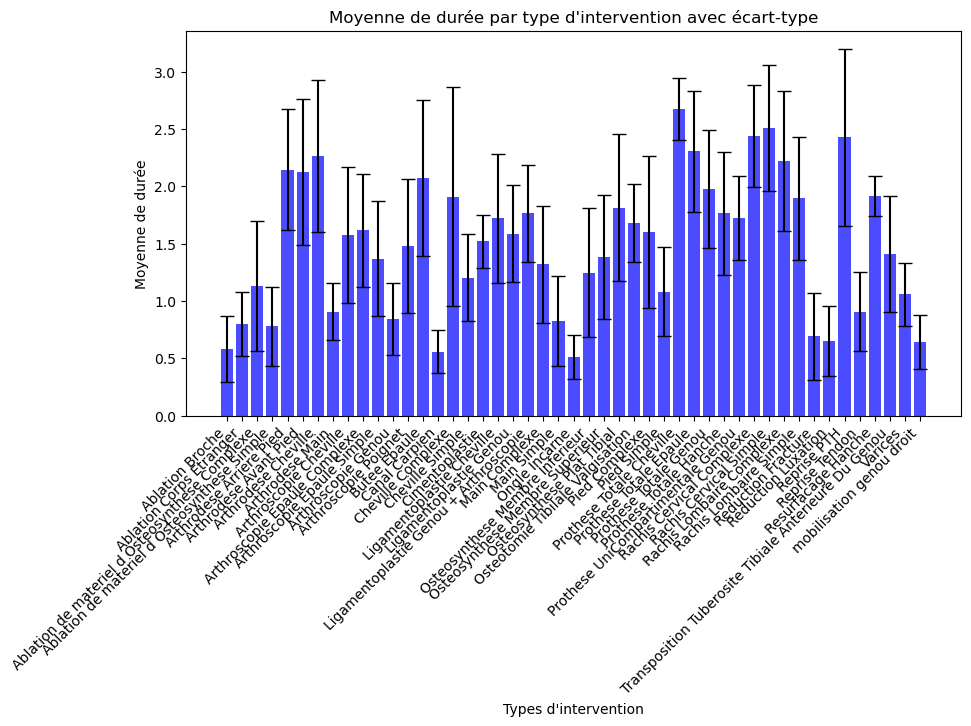

In [17]:
# Extrait les données nécessaires du DataFrame
types_intervention = stat.index
moyennes_interv = stat['meanInterv']
variances_interv = stat['stdInterv']

# Créez un graphique en barres pour les moyennes avec des barres d'erreur
plt.figure(figsize=(10, 5))
plt.bar(types_intervention, moyennes_interv, yerr=variances_interv, capsize=5, color='b', alpha=0.7)
plt.xlabel('Types d\'intervention')
plt.ylabel('Moyenne de durée')
plt.title('Moyenne de durée par type d\'intervention avec écart-type')
plt.xticks(rotation=45, ha='right')
#plt.tight_layout()

# Affichez le graphique
plt.show()

In [4]:
df = pd.read_excel('Bdd_bloc.xlsx')
pd.options.display.max_columns = 33
pd.options.display.max_rows = 50

#renomme les colonnes  
df.columns = ['NoCas', 'DateEntry', 'DateExit', 'DateBirth', 'Sex',
       'CIMDiagPr', 'CimAssoc1', 'CimAssoc2', 'CimAssoc3',
       'CimAssoc4', 'CimAssoc5', 'CCAM1', 'CCAM2', 'CCAM3', 'CCAM4',
       'GHMCode', 'Colonne2', 'Colonne1', 'Molon', 'Anesthesiste',
       'Chirurgien', 'Year', 'IDPatient', 'DateInter', 'NomPatient',
       'HourEntrySSPI',
       'HourEntryBLOC', 'HourIncision ',
       'HourExitBLOC', 'AnesthType',
       'AnesthLoco_reg', 'TimeHospit', 'Interv']

#on enlève les colonnes inutiles 
df = df.drop(columns=['Colonne2', 'Colonne1', 'Molon', 'NomPatient'])
df

,NoCas,DateEntry,DateExit,DateBirth,Sex,CIMDiagPr,CimAssoc1,CimAssoc2,CimAssoc3,CimAssoc4,CimAssoc5,CCAM1,CCAM2,CCAM3,CCAM4,GHMCode,Anesthesiste,Chirurgien,Year,IDPatient,DateInter,HourEntrySSPI,HourEntryBLOC,HourIncision,HourExitBLOC,AnesthType,AnesthLoco_reg,TimeHospit,Interv
0,1680579,2019-01-04,2019-01-04,1956-07-28,1,I83.9,NaN,NaN,NaN,NaN,NaN,EJSA001,EJFA002,NaN,NaN,05C17J,OU,PI,2019,45133,2019-01-04,13:54:00,13:55:00,00:00:00,15:05:00,AG ventilation spontanée/lunettes O2,NaN,1,Varices
1,1680210,2019-01-07,2019-01-07,1938-08-08,2,I83.9,E07.9,E75.6,NaN,NaN,NaN,EJSA001,EJFA002,NaN,NaN,05C17J,OU,PI,2019,119819,2019-01-07,07:54:00,07:54:00,08:12:00,08:28:00,AG ventilation spontanée/lunettes O2,NaN,1,Varices
2,1680050,2019-01-07,2019-01-07,1993-07-10,2,I83.9,G43.8,NaN,NaN,NaN,NaN,EJFA002,EJSA001,NaN,NaN,05C17J,BO,PI,2019,119783,2019-01-07,08:20:00,08:38:00,08:53:00,09:25:00,AG ventilation spontanée/lunettes O2,NaN,1,Varices
3,1680580,2019-01-07,2019-01-07,1956-07-28,1,I83.9,NaN,NaN,NaN,NaN,NaN,EJSA001,EJFA002,NaN,NaN,05C17J,BO,PI,2019,45133,2019-01-07,09:21:00,09:40:00,09:56:00,10:39:00,AG ventilation spontanée/lunettes O2,NaN,1,Varices
4,1678286,2019-01-04,2019-01-04,1961-09-20,2,M20.1,F17.25,F41.8,R00.2,NaN,NaN,NDPA002,NJPA029,YYYY012,AHQJ021,08C37J,OU,OV,2019,91238,2019-01-04,13:22:00,14:13:00,14:29:00,15:10:00,AG ventilation spontanée/lunettes O2,Bloc Pied,1,Pied Complexe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14644,1878975,2022-11-17,2022-11-18,1963-07-31,2,M75.1,M75.2,NaN,NaN,NaN,NaN,MJDC001,MEMC003,AHQJ021,NaN,08C581,BO,DO,2022,136517,2022-11-17,09:46:00,10:35:00,10:58:00,12:00:00,AG avec masque laryngé,Bloc Inter-scalénique,2,Arthroscopie Epaule Complexe
14645,1885187,2022-12-07,2022-12-09,1972-12-04,1,S92.00,M65.87,NaN,NaN,NaN,NaN,NDCA004,NJPA018,YYYY012,AHQJ021,08C551,BO,CA,2022,151979,2022-12-07,14:07:00,14:37:00,14:55:00,16:06:00,AG avec masque laryngé,Bi Bloc sciatique + fémoral,3,Osteosynthese Membre Inferieur
14646,1857695,2022-11-17,2022-11-18,1966-06-06,1,M84.13,M65.83,F17.25,F10.26,F41.8,NaN,MJFA018,MCPA013,MDQK001,YYYY188,08C391,OU,MA,2022,147060,2022-11-17,07:22:00,00:00:00,08:38:00,00:00:00,AG avec intubation,Bloc Axillaire,2,Main Complexe
14647,1881099,2022-11-04,2022-11-05,1983-04-19,2,M23.51,NaN,NaN,NaN,NaN,NaN,NFMC003,NFEC002,AHQJ021,NFQK001,08C341,OU,CA,2022,40361,2022-11-04,10:57:00,11:30:00,11:59:00,13:01:00,AG avec masque laryngé,Bi Bloc sciatique + fémoral,2,Ligamentoplastie Genou + Arthroscopie


In [5]:
df.value_counts('Chirurgien')

Chirurgien
CA    2014
SC    1944
CH    1820
MA    1661
JA    1585
DO    1517
LU    1218
PI     685
LO     543
FR     414
TA     401
LA     243
JO     151
HO     118
FE      92
GH      88
OV      20
BA      20
RE      11
PU       5
FU       1
Name: count, dtype: int64